# GDSCv2 Interpretation

This notebook shows some example on how to interpret the output from the Bayesian model to infer responses of basket/cluster combinations.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

sys.path.append('..')
sys.path.append('.')

In [3]:
from pyBasket.common import load_obj
from pyBasket.interpret import get_predicted_basket_df, get_basket_cluster_prob_df, find_top_k_indices, find_bottom_k_indices
from pyBasket.interpret import select_partition, plot_responsive_count, get_member_expression, ttest_dataframe
from pyBasket.interpret import plot_expression_boxplot, df_diff, plot_basket_probs, plot_basket_cluster_heatmap
from pyBasket.clustering import plot_PCA

# Load results

Load previously saved results

In [4]:
drug_name = 'Docetaxel'
C = 10

In [5]:
input_dir = 'results'
file_name = 'patient_analysis_%s_cluster_%d.p' % (drug_name, C)
save_data = load_obj(os.path.join(input_dir, file_name))

In [6]:
list(save_data.keys())

['expr_df_filtered',
 'expr_df_selected',
 'drug_response',
 'class_labels',
 'cluster_labels',
 'patient_df',
 'stacked_posterior',
 'trace',
 'importance_df']

# Things to show in the viz

## Basket probabilities

In [7]:
predicted_basket_df = get_predicted_basket_df(save_data)
predicted_basket_df

,prob
Biliary Tract,0.374548
Bladder/Urinary Tract,0.436767
Bone,0.559616
Bowel,0.471680
Breast,0.401313
Cervix,0.308916
CNS/Brain,0.292396
Esophagus/Stomach,0.346163
Head and Neck,0.348925
Kidney,0.444498


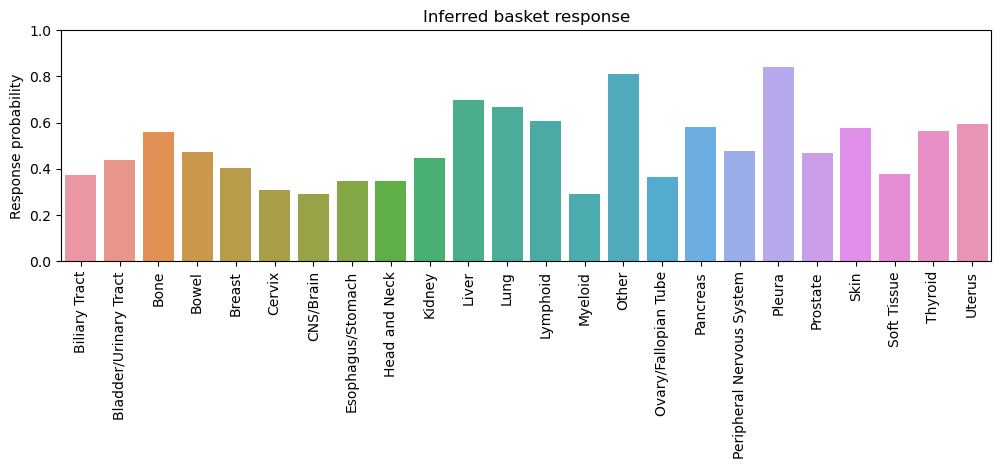

In [8]:
plot_basket_probs(predicted_basket_df)

## Overall heatmap

In [9]:
inferred_df = get_basket_cluster_prob_df(save_data)

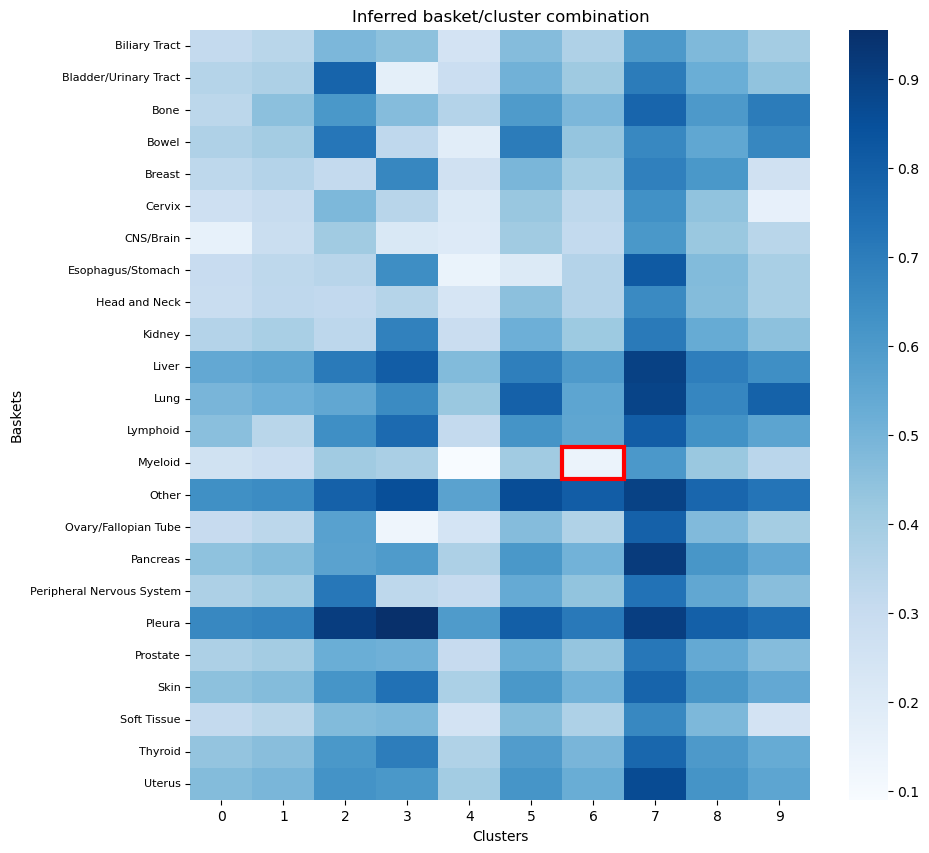

In [10]:
plot_basket_cluster_heatmap(inferred_df, 6, 13)

# Any interesting data to look at?

## Which basket/cluster combinations have the highest / lowest response rates?

In [11]:
top_df = find_top_k_indices(save_data, 10)
top_df

,basket_idx,cluster_idx,basket,cluster,probability,count
0,18,3,Pleura,3,0.955827,8
1,16,7,Pancreas,7,0.916971,3
2,18,2,Pleura,2,0.910192,2
3,18,7,Pleura,7,0.907960,0
4,10,7,Liver,7,0.898406,1
5,14,7,Other,7,0.895674,0
6,11,7,Lung,7,0.891272,1
7,23,7,Uterus,7,0.865310,1
8,14,5,Other,5,0.858549,1
9,14,3,Other,3,0.853326,1


In [12]:
bottom_df = find_bottom_k_indices(save_data, 10)
bottom_df

,basket_idx,cluster_idx,basket,cluster,probability,count
0,13,4,Myeloid,4,0.090105,11
1,15,3,Ovary/Fallopian Tube,3,0.130517,4
2,13,6,Myeloid,6,0.142313,2
3,7,4,Esophagus/Stomach,4,0.147534,1
4,6,0,CNS/Brain,0,0.159881,1
5,5,9,Cervix,9,0.161397,2
6,1,3,Bladder/Urinary Tract,3,0.173369,3
7,3,4,Bowel,4,0.185966,1
8,6,4,CNS/Brain,4,0.204251,0
9,7,5,Esophagus/Stomach,5,0.205785,2


## Inspect one partition

In [13]:
query_basket = 'Myeloid'
query_cluster = 4
selected_df = select_partition(save_data, query_basket, query_cluster)
selected_df

,tissues,responses,basket_number,cluster_number,responsive
samples,,,,,
NKM-1,Myeloid,0.207063,13,4,0
Ku812,Myeloid,0.231664,13,4,0
EM-2,Myeloid,0.241604,13,4,0
KY821,Myeloid,0.234809,13,4,0
EoL-1,Myeloid,0.201574,13,4,0
BV-173,Myeloid,0.283491,13,4,0
KMOE-2,Myeloid,0.126621,13,4,1
TUR,Myeloid,0.225919,13,4,0
LAMA-84,Myeloid,0.222811,13,4,0


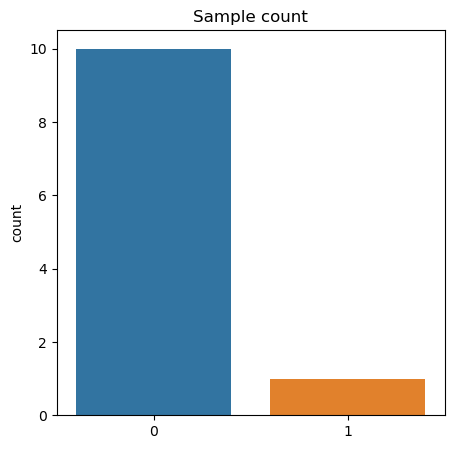

In [14]:
plot_responsive_count(selected_df)

In [15]:
member_df = get_member_expression(selected_df, save_data)
member_df.shape

(11, 500)

PCA explained variance [0.24726442 0.39391516]


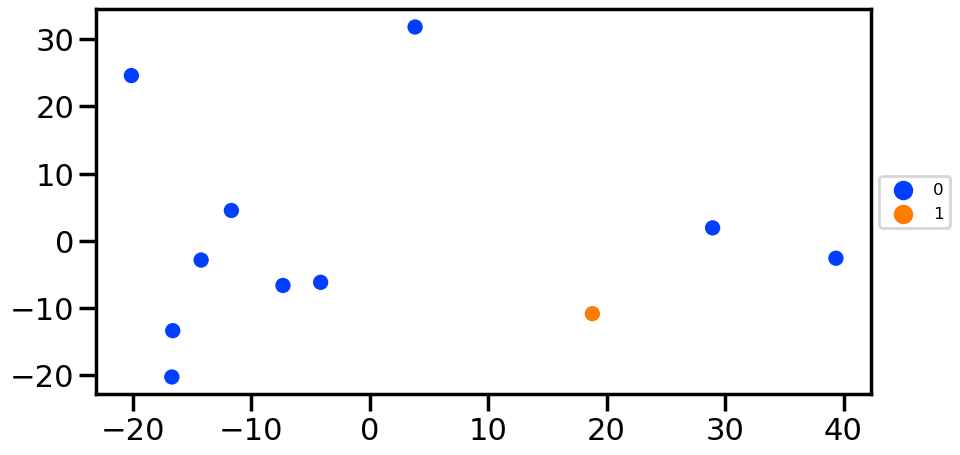

In [16]:
pc1, pc2 = plot_PCA(member_df, hue=selected_df['responsive'], n_components=2)

Pick the first transcript as it has the highest importance score during feature selection.

In [17]:
all_expr_df = df_diff(member_df, save_data['expr_df_selected'])
all_expr_df.shape

(292, 500)

In [18]:
test_df = ttest_dataframe(member_df, all_expr_df, only_significant=True)
test_df

/Users/joewandy/Work/git/pyBasket/notebooks/../pyBasket/interpret.py:204: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = ttest_ind(df1[column], df2[column])


,T-Statistic,P-Value,P-Value (Bonferroni),Significant
Feature,,,,
ENSG00000136856.18,-11.412853,2.606481e-25,1.303241e-22,True
ENSG00000110077.14,9.815878,6.516775e-20,3.258388e-17,True
ENSG00000088387.19,-9.245417,4.436558e-18,2.218279e-15,True
ENSG00000072134.15,-7.465488,9.005014e-13,4.502507e-10,True
ENSG00000106803.10,-6.853791,4.071685e-11,2.035842e-08,True
ENSG00000130675.15,-6.730275,8.555250e-11,4.277625e-08,True
ENSG00000149781.12,6.577287,2.118021e-10,1.059010e-07,True
ENSG00000105967.16,6.202876,1.828481e-09,9.142403e-07,True
ENSG00000100852.13,-6.164311,2.271232e-09,1.135616e-06,True


In [19]:
selected_feature = test_df.index.values[0]
selected_feature

'ENSG00000136856.18'

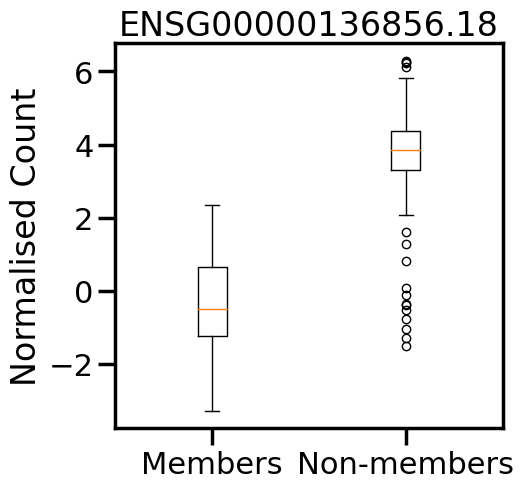

In [20]:
plot_expression_boxplot(selected_feature, member_df, all_expr_df)